In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!ls LogFiles

keras_run.csv  main_run.csv


In [3]:
df = pd.read_csv('LogFiles/keras_run.csv', index_col=False) 
df.head()

,Seed,Algorithm,Preprocessing Pipeline,Scaling,Sampling,time,precision,recall,result_profit
0,1,KerasNN_6l_12n_or_iu_lm_d4,Joris_Pipeline,StandardScaler,RandomOverSampler_0.2,0:01:24.263231,0.578313,0.780488,0.567
1,1,KerasNN_6l_6n_oa_ih_lm_d4,Joris_Pipeline,Normalizer,TomekLinks,0:01:24.394353,0.563253,0.273792,0.194
2,1,KerasNN_6l_12n_oa_ih_lm_d4,Morten_Pipeline,RobustScaler,SMOTETomek,0:02:07.737026,0.762048,0.608173,0.537
3,1,KerasNN_6l_6n_oa_ih_lm_d4,Joris_Pipeline,Normalizer,EditedNN,0:01:08.886222,0.620482,0.289733,0.223
4,1,KerasNN_6l_12n_or_iu_lm_d4,Joris_Pipeline,StandardScaler,RandomOverSampler_0.5,0:01:41.676216,0.689759,0.687688,0.572


In [4]:
data_to_plot = df[df.result_profit > 0][['Algorithm','precision','recall']].melt(id_vars=['Algorithm'], var_name='Metric', value_name='values')

In [5]:
data_to_plot.head()

,Algorithm,Metric,values
0,KerasNN_6l_12n_or_iu_lm_d4,precision,0.578313
1,KerasNN_6l_6n_oa_ih_lm_d4,precision,0.563253
2,KerasNN_6l_12n_oa_ih_lm_d4,precision,0.762048
3,KerasNN_6l_6n_oa_ih_lm_d4,precision,0.620482
4,KerasNN_6l_12n_or_iu_lm_d4,precision,0.689759


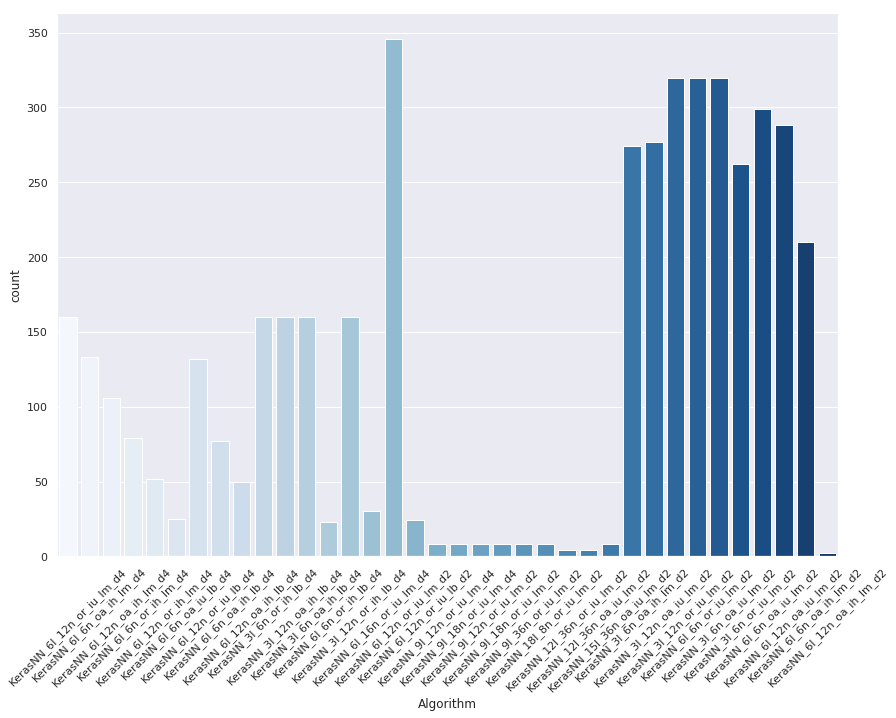

In [6]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.countplot(x='Algorithm', data=df, palette='Blues')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig('plots/keras/algorithms_count.png')

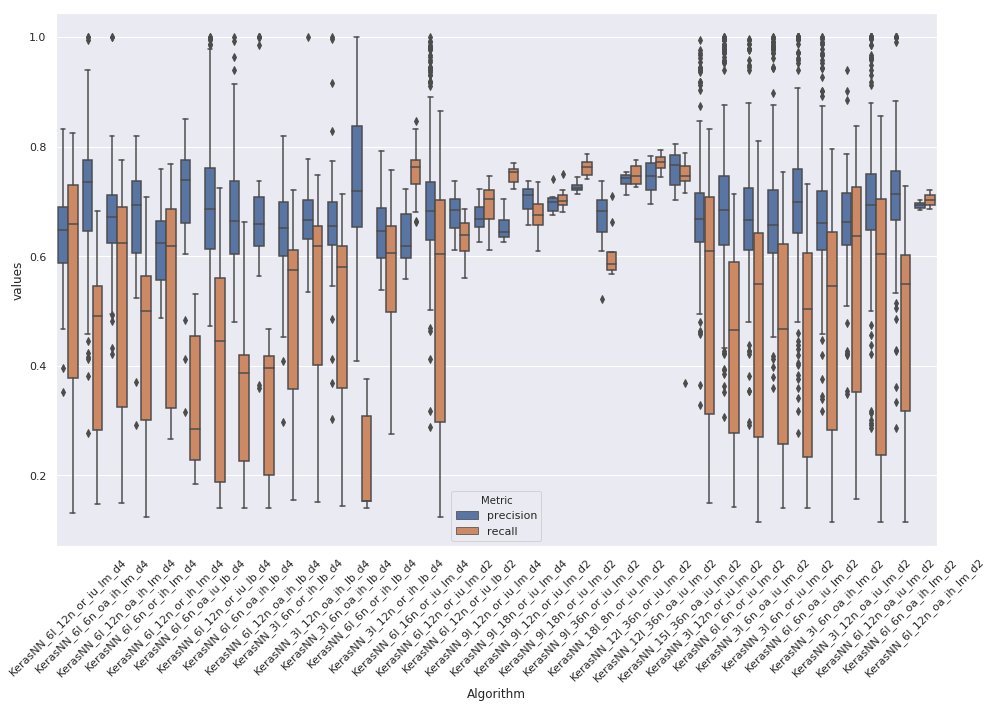

In [7]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='Algorithm', y='values',data=data_to_plot,hue='Metric')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()

plt.savefig('plots/keras/algorithms_precision_recall_boxplots.png')

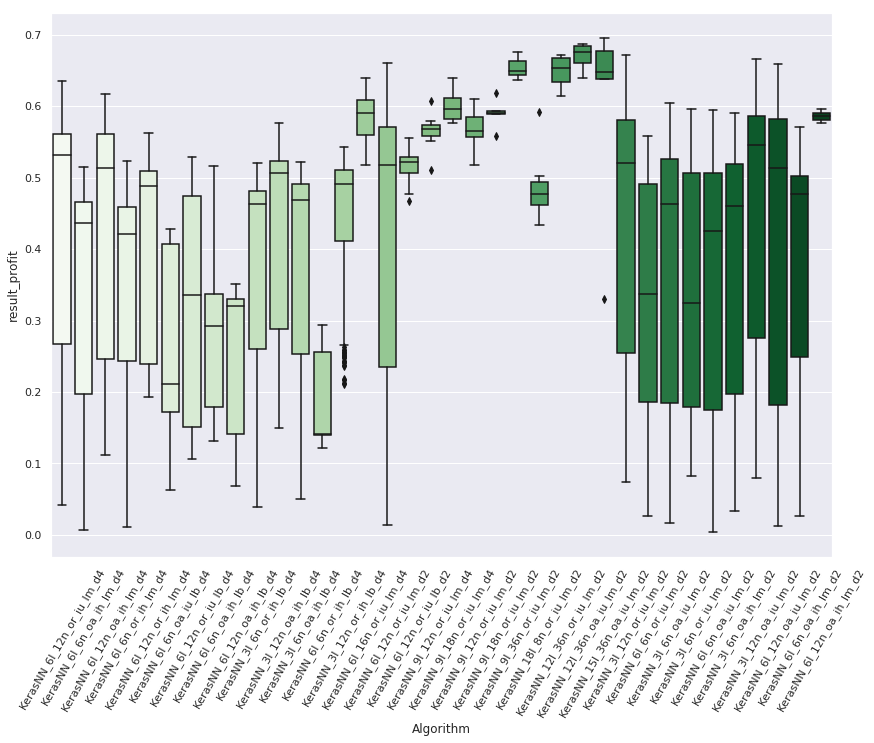

In [8]:
ax = sns.boxplot(x='Algorithm', y='result_profit',data=df[df.result_profit > 0], palette="Greens")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/keras/algorithms_profit_share_boxplots_unranked.png')

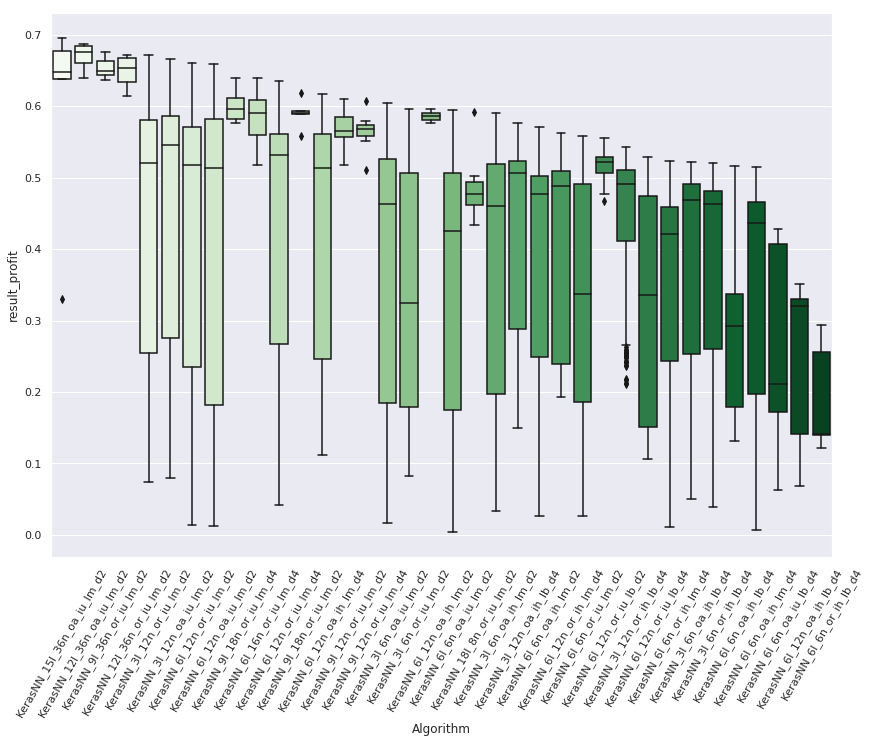

In [9]:
ranks = df[df.result_profit > 0].groupby("Algorithm")["result_profit"].max().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Algorithm', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/keras/algorithms_profit_share_boxplots_maxrank.png')

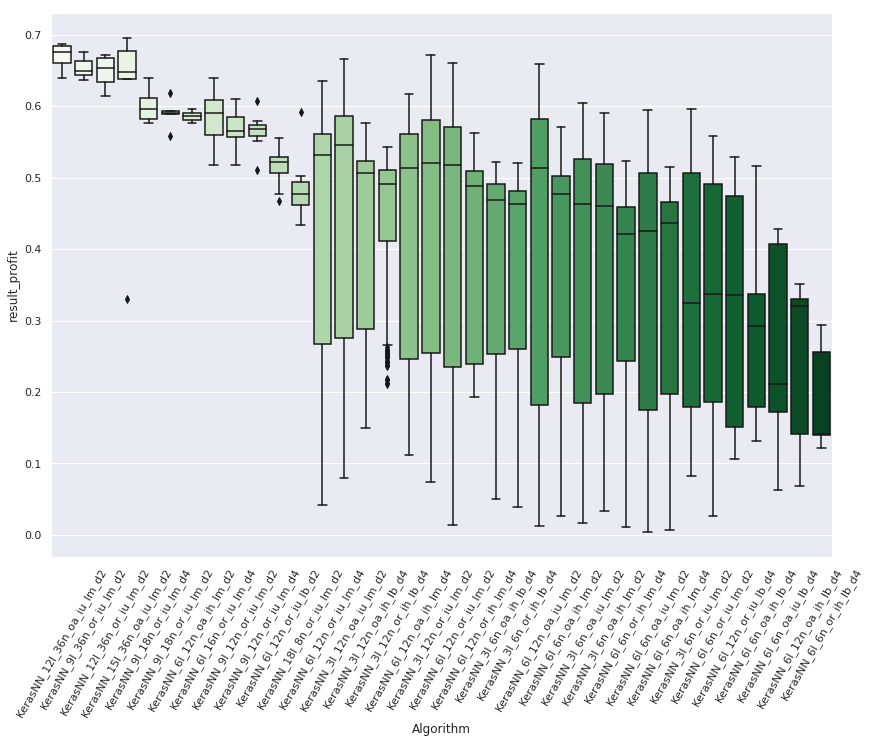

In [10]:
ranks = df[df.result_profit > 0].groupby("Algorithm")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Algorithm', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/keras/algorithms_profit_share_boxplots_meanrank.png')

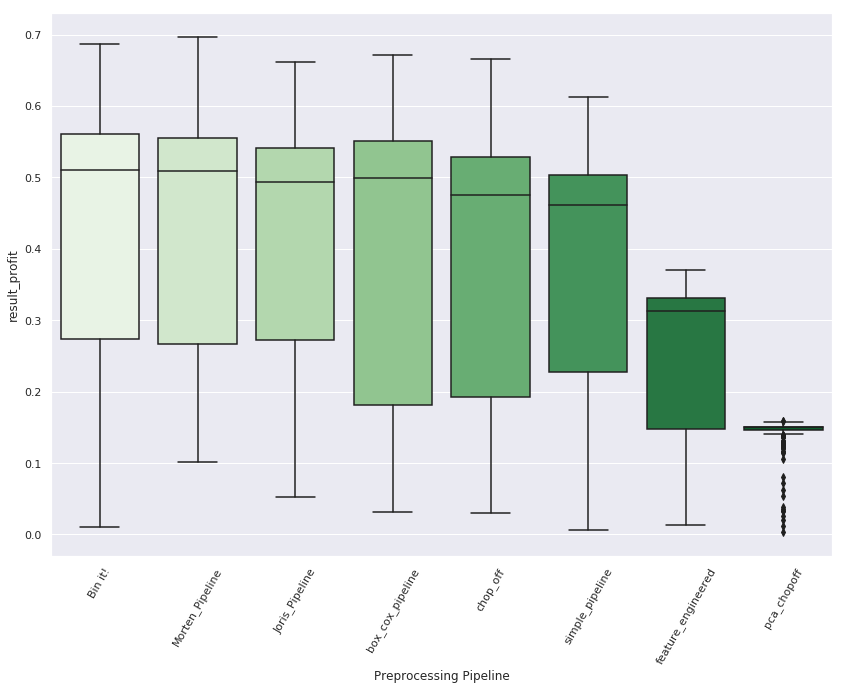

In [11]:
ranks = df[df.result_profit > 0].groupby("Preprocessing Pipeline")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Preprocessing Pipeline', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/keras/pipeline_profit_share_boxplots_meanrank.png')

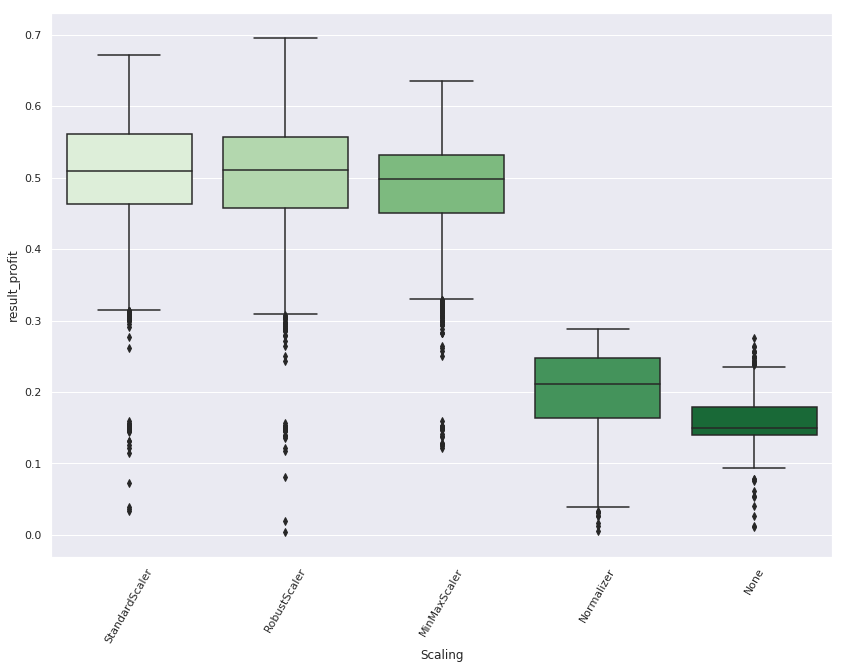

In [12]:
ranks = df[df.result_profit > 0].groupby("Scaling")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Scaling', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/keras/scaling_profit_share_boxplots_meanrank.png')

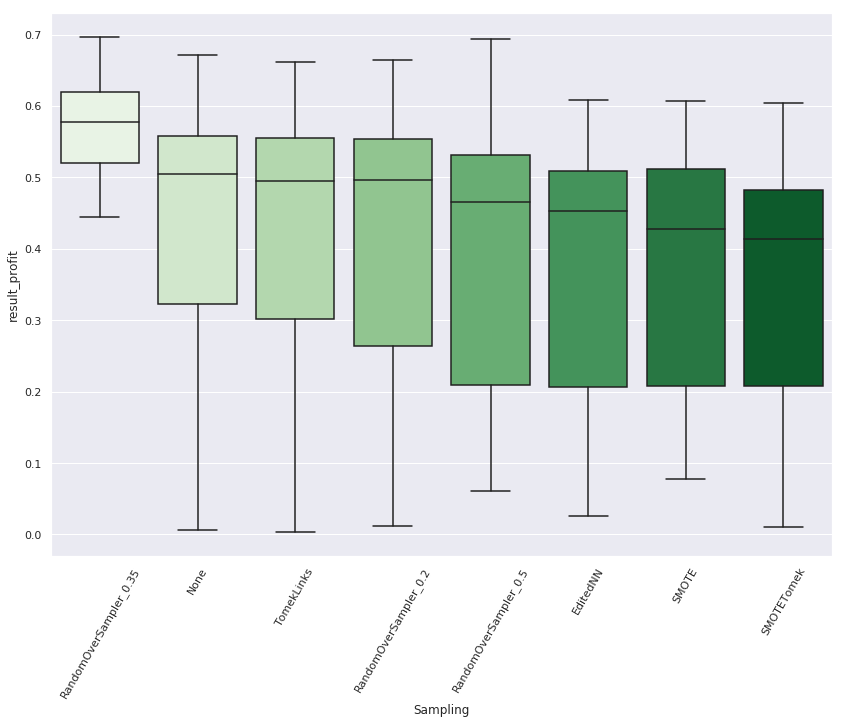

In [13]:
ranks = df[df.result_profit > 0].groupby("Sampling")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Sampling', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/keras/sampling_profit_share_boxplots_meanrank.png')

## Scatterplots


In [14]:
ranks[0:6]

Index(['RandomOverSampler_0.35', 'None', 'TomekLinks', 'RandomOverSampler_0.2',
       'RandomOverSampler_0.5', 'EditedNN'],
      dtype='object', name='Sampling')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


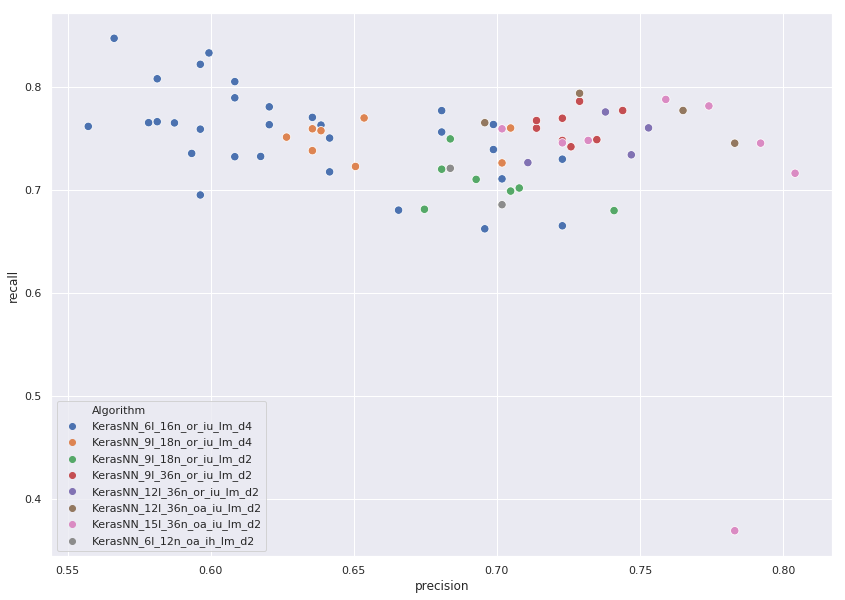

In [15]:
ranks = df[df.result_profit > 0].groupby("Algorithm")["result_profit"].mean().fillna(0).sort_values()[::-1].index

highest_scores = df[df.result_profit > 0][df.Algorithm.isin(ranks[0:8])]
sns.scatterplot(x='precision', y='recall', hue='Algorithm', data=highest_scores,s=70)
plt.savefig('plots/keras/main_algorithms_precision_recall_scatterplot.png')

## Violinplot

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


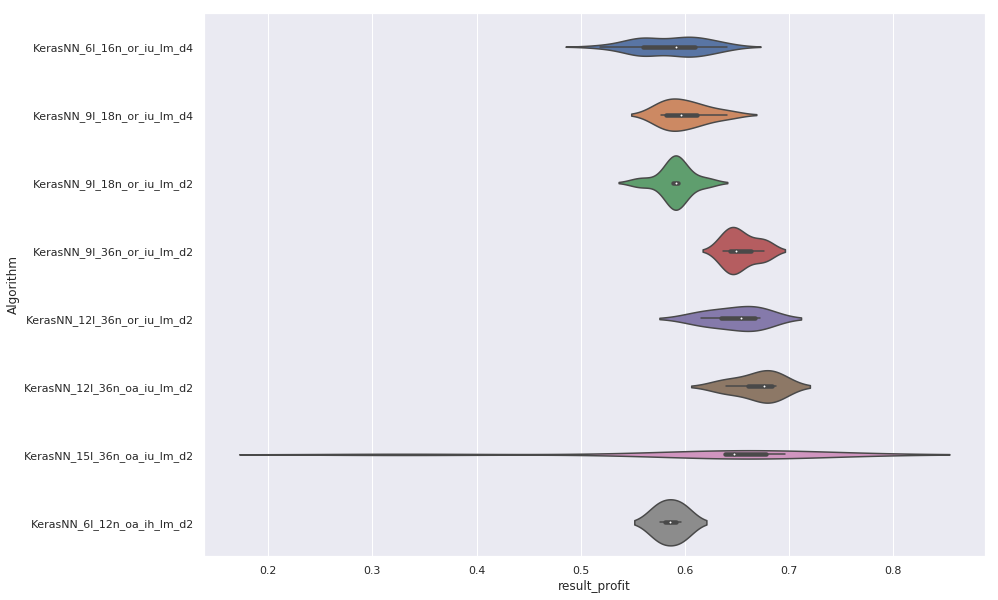

In [16]:
ranks = df[df.result_profit > 0].groupby("Algorithm")["result_profit"].mean().fillna(0).sort_values()[::-1].index

highest_scores = df[df.result_profit > 0][df.Algorithm.isin(ranks[0:8])]
sns.violinplot(x='result_profit', y='Algorithm', data=highest_scores)
plt.savefig('plots/keras/main_algorithms_profit_share_violinplot.png')

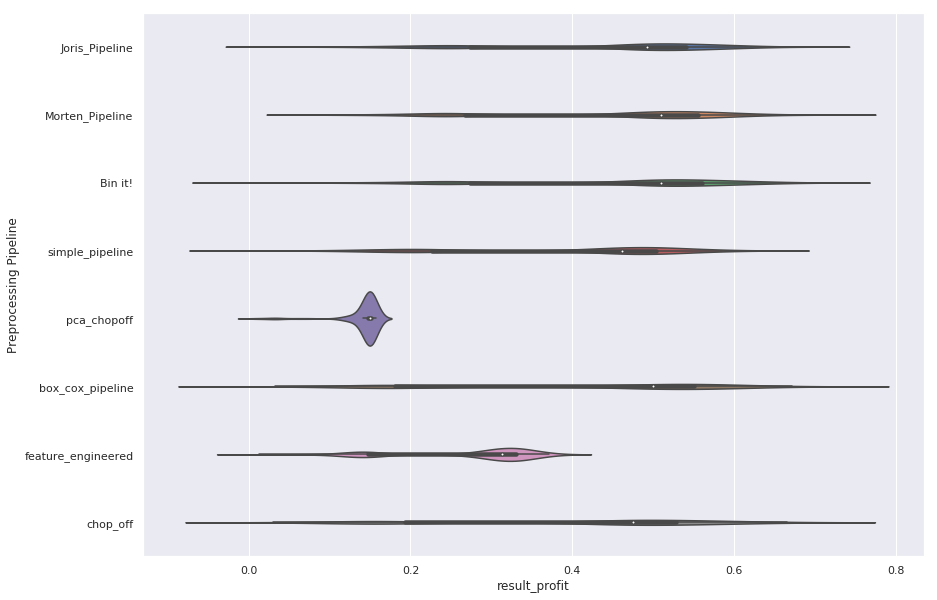

In [17]:
sns.violinplot(x='result_profit', y='Preprocessing Pipeline', data= df[df.result_profit > 0])
plt.savefig('plots/keras/pipelines_profit_share_violinplot.png')